In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print (coordinate[0], coordinate[1])

77.7153797859861 115.43934154939495
-68.64267959517984 133.96557102275938
75.52263016055986 49.455785649284564
-87.99827596003801 98.11436823770072
-17.005251940983754 -19.41910829620673
-22.734098905254683 -136.28471913841017
49.15057450794595 -165.34656284825542
39.99194773423642 82.35297482744772
88.46719588122346 40.48592516309881
60.14471330565473 10.437224656257655
-45.81670640165096 138.17936000324238
61.572576023212434 104.53569188429282
4.928352046409756 -175.38824403242268
-10.514657969701503 56.81613729867735
-76.22478397375569 134.26017772943038
-39.82665154278628 -21.674147329672792
-5.087664443901829 158.55964435139367
-4.944343291132142 102.52039005772224
59.596368449373074 -174.71063651102145
4.447358885019639 67.08987745503978
-89.63211146607648 152.20680480992326
-68.5166286949869 -124.08975617378441
-25.34259096198214 -90.99367399550671
-37.513912821178415 -151.15389295616743
-45.134399984045785 -19.206652469367924
-5.586930156209661 -166.1501373786996
-73.4001504041

17.87410021178748 169.47933678063066
-61.23583668933066 78.79962594764538
37.31347575012428 -134.57200738281907
64.70222109429983 77.52644663641809
-78.64488034758507 -58.82737161302832
83.08413287206244 -116.90446382677098
-47.41599083561725 68.09636296378281
62.50684376643474 -168.8943409430297
-25.89616640372421 14.98589650674964
13.764272285173817 141.17843594304622
54.9769445884684 -45.783982930824436
78.68761066846898 -122.28584709149865
52.29430801310917 -129.53356903104572
89.57954179924548 1.0932157831863947
-53.50514802603795 51.73664024218431
-78.85556293651179 -88.21216097302555
38.159031589146764 -112.7675959261411
13.342317166280992 -5.94655368854481
7.735737697587851 110.09313414319575
-3.1564074105106386 165.5452738087414
19.908259327813084 71.9990538585065
-73.33916187817951 -131.12696354441204
-35.357148889301264 118.35159364282885
49.30403226672064 15.787412447642907
-38.82746866723853 -61.038189710678
73.64125852661746 89.86043345391676
7.50941674189724 96.639014462

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [7]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

623

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [9]:
#Import the requests library.
import requests

#import the API key
from config import weather_api_key

In [10]:
#Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

#print (url)

In [11]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list.
#for i range(len(cities)):
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 the the record count
    record_count += 1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON data and retrieve data.
        city_weather = requests.get(city_url).json()
       
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass #not good practice to use pass statement in except block
    
#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | kuche
City not found. Skipping...
Processing Record 9 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 1 | jevnaker
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | vanavara
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | kieta
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | mahibadhoo
Processing Record 20 of Set 1 | bluff
Processing

Processing Record 38 of Set 4 | quatre cocos
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | arlit
Processing Record 41 of Set 4 | axim
Processing Record 42 of Set 4 | severo-kurilsk
Processing Record 43 of Set 4 | jacareacanga
Processing Record 44 of Set 4 | sao miguel do araguaia
Processing Record 45 of Set 4 | phonhong
Processing Record 46 of Set 4 | ust-kuyga
Processing Record 47 of Set 4 | oktyabrskoye
Processing Record 48 of Set 4 | yirol
City not found. Skipping...
Processing Record 49 of Set 4 | sovetskiy
Processing Record 50 of Set 4 | pangai
Processing Record 1 of Set 5 | kuala terengganu
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | verkhnevilyuysk
Processing Record 4 of Set 5 | hay river
Processing Record 5 of Set 5 | matara
Processing Record 6 of Set 5 | gambela
Processing Record 7 of Set 5 | xinye
Processing Record 8 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 5 | pouebo
Proc

Processing Record 27 of Set 8 | masuguru
Processing Record 28 of Set 8 | trincomalee
Processing Record 29 of Set 8 | baculin
Processing Record 30 of Set 8 | gari
Processing Record 31 of Set 8 | atar
Processing Record 32 of Set 8 | luderitz
Processing Record 33 of Set 8 | robertson
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | mengcheng
Processing Record 36 of Set 8 | wencheng
Processing Record 37 of Set 8 | abu kamal
Processing Record 38 of Set 8 | hirado
Processing Record 39 of Set 8 | colmenar viejo
Processing Record 40 of Set 8 | mahanoro
Processing Record 41 of Set 8 | palmer
Processing Record 42 of Set 8 | gwadar
Processing Record 43 of Set 8 | honiara
Processing Record 44 of Set 8 | nguiu
City not found. Skipping...
Processing Record 45 of Set 8 | marzuq
Processing Record 46 of Set 8 | wanaka
Processing Record 47 of Set 8 | redlands
Processing Record 48 of Set 8 | mulege
Processing Record 49 of Set 8 | ahipara
Processing Record 50 of Set 8 | iquique
Proces

Processing Record 12 of Set 12 | santa cruz
Processing Record 13 of Set 12 | talcahuano
Processing Record 14 of Set 12 | hirara
Processing Record 15 of Set 12 | tiznit
Processing Record 16 of Set 12 | areia branca
Processing Record 17 of Set 12 | priargunsk
Processing Record 18 of Set 12 | fengxian
Processing Record 19 of Set 12 | carmen del parana
Processing Record 20 of Set 12 | tilichiki
Processing Record 21 of Set 12 | beringovskiy
Processing Record 22 of Set 12 | pitea
Processing Record 23 of Set 12 | chapeco
Processing Record 24 of Set 12 | honavar
Processing Record 25 of Set 12 | sorong
Processing Record 26 of Set 12 | baryatino
Processing Record 27 of Set 12 | atagay
Processing Record 28 of Set 12 | madera
Processing Record 29 of Set 12 | san carlos de bariloche
Processing Record 30 of Set 12 | canton
Processing Record 31 of Set 12 | shimoda
Processing Record 32 of Set 12 | santa rosa
Processing Record 33 of Set 12 | anori
Processing Record 34 of Set 12 | umm durman
City not fo

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,28.96,86,43,16.40,RU,2022-05-12 05:01:17
1,New Norfolk,-42.7826,147.0587,59.92,66,100,0.74,AU,2022-05-12 05:01:18
2,Albany,42.6001,-73.9662,54.91,61,3,2.24,US,2022-05-12 05:00:34
3,Georgetown,5.4112,100.3354,89.53,70,20,2.30,MY,2022-05-12 05:01:20
4,Rikitea,-23.1203,-134.9692,76.95,82,9,19.75,PF,2022-05-12 05:01:20
5,Bethel,41.3712,-73.4140,60.76,88,0,5.73,US,2022-05-12 05:01:21
6,Jevnaker,60.2414,10.3850,46.87,73,26,3.24,NO,2022-05-12 05:01:23
7,Portland,45.5234,-122.6762,51.84,68,100,3.00,US,2022-05-12 04:57:55
8,Vanavara,60.3400,102.2797,59.25,41,49,8.25,RU,2022-05-12 05:01:24
9,Victoria,22.2855,114.1577,80.65,93,100,8.99,HK,2022-05-12 05:00:45


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-05-12 05:01:17,71.9167,114.0833,28.96,86,43,16.40
1,New Norfolk,AU,2022-05-12 05:01:18,-42.7826,147.0587,59.92,66,100,0.74
2,Albany,US,2022-05-12 05:00:34,42.6001,-73.9662,54.91,61,3,2.24
3,Georgetown,MY,2022-05-12 05:01:20,5.4112,100.3354,89.53,70,20,2.30
4,Rikitea,PF,2022-05-12 05:01:20,-23.1203,-134.9692,76.95,82,9,19.75
5,Bethel,US,2022-05-12 05:01:21,41.3712,-73.4140,60.76,88,0,5.73
6,Jevnaker,NO,2022-05-12 05:01:23,60.2414,10.3850,46.87,73,26,3.24
7,Portland,US,2022-05-12 04:57:55,45.5234,-122.6762,51.84,68,100,3.00
8,Vanavara,RU,2022-05-12 05:01:24,60.3400,102.2797,59.25,41,49,8.25
9,Victoria,HK,2022-05-12 05:00:45,22.2855,114.1577,80.65,93,100,8.99


In [14]:
#Create the output file(CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [17]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

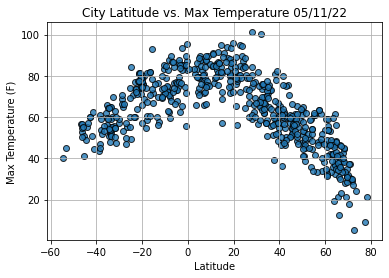

In [19]:
#Import time module 
import time

#Build the scatter plot for latitude vs vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show Plot.
plt.show()

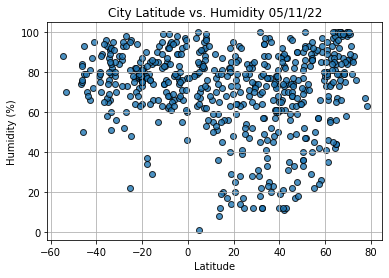

In [21]:
#Import time module 
import time

#Build the scatter plot for latitude vs vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show Plot.
plt.show()

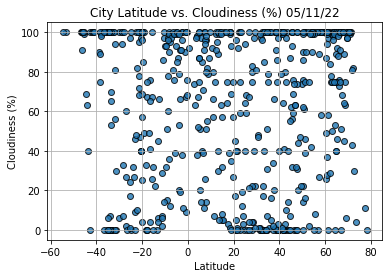

In [22]:
#Import time module 
import time

#Build the scatter plot for latitude vs vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show Plot.
plt.show()

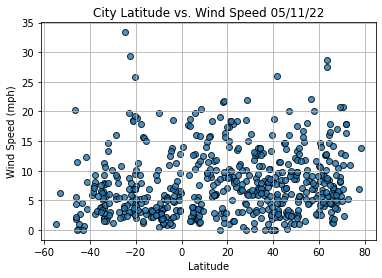

In [23]:
#Import time module 
import time

#Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show Plot.
plt.show()